In [226]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [227]:
def sigmoid_func(z):
  # sigmoid function
  return 1/(1+np.exp(-z))

def generate_data(m):
  """
  Generate training set of size m
  """
  n=10 # number of elements, w E R^10

  # (a) Generate w* s.t. each element f w* is N(0,1), & normalize w*. w*=true weight vector of shape (n,1)
  w_star = np.random.randn(n) # (i) generates a random vector of n elements from a N(0,1)
  w_star = w_star/np.linalg.norm(w_star) # (ii) w*/||w*||: normalizing vector by dividing each element by the Euclidean norm (length) of the vector

  # (b) Generate training set {(x1,y1),...,(xm,ym)} of size m. Don't normalize
  X = np.random.randn(m,n) # (i) X = matrix of shape (m, n) from a N(0,1). m = # training samples, n = # elements in each training sample
  # Compute the probabilities using the sigmoid function
  # w*T shape (1,n) -> put in column vector to transform w* to w*T
  # .dot function for matrix multiplication
  sigmoid = sigmoid_func(np.dot(X,w_star))

  # (ii) Generate yi based on GENLABEL function
  uniform_samples = np.random.uniform(0,1,m) # X ~ Uniform(0,1)
  y = np.zeros(m, int) # y = label vector of shape (m,)
  for i in range (m):
    if uniform_samples[i] <= sigmoid[i]:
      y[i] = 1
  # returns the true w as well as X, y data
  return w_star, X, y

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [228]:
def gradient_descent_faster(X,y,m,n,w_prime,learning_rate=0.01,iterations=1000):
  for i in range(iterations):
    # Calculate gradient of loss using all datapoints
    sigmoid = sigmoid_func(np.dot(X, w_prime))

    # gradient = (1/m) * np.dot(X.T, (sigmoid-y) * sigmoid * (1-sigmoid))
    # Look at handwork below for gradient calculation
    gradient = (1/m) * np.dot((sigmoid-y) * sigmoid * (1-sigmoid),X)

    # Update weights
    w_prime = w_prime - learning_rate * gradient
  return w_prime

def gradient_descent_slower(X,y,m,n,w_prime,learning_rate=0.01,iterations=1000):
  for i in range(iterations):
    gradient = np.zeros(n) # initialize gradient for each m set

    # Calculate for each i the gradient of loss
    for i in range(m):
      # Calculate the gradient of loss using all the datapoints in m
      sigmoid = sigmoid_func(np.dot(X[i], w_prime))
      # Sum the gradients for each m set
      gradient += np.dot((sigmoid-y[i]) * sigmoid * (1-sigmoid),X[i])

    # Update weights
    w_prime = w_prime - learning_rate * gradient/m
  return w_prime

# Student Side Note:  Both of these gradient functions output the same values for w_prime. The difference is that _slower takes a significantly longer time compared to _faster. Look at the print statement at the end of the problem labeled "Gradient Descent, Slower/Faster: Results of ||w-w'||" to see that ||w-w'|| is the same for both lines. Look at the print statement also with the times to see that _faster has a faster computational time compared to _slower.

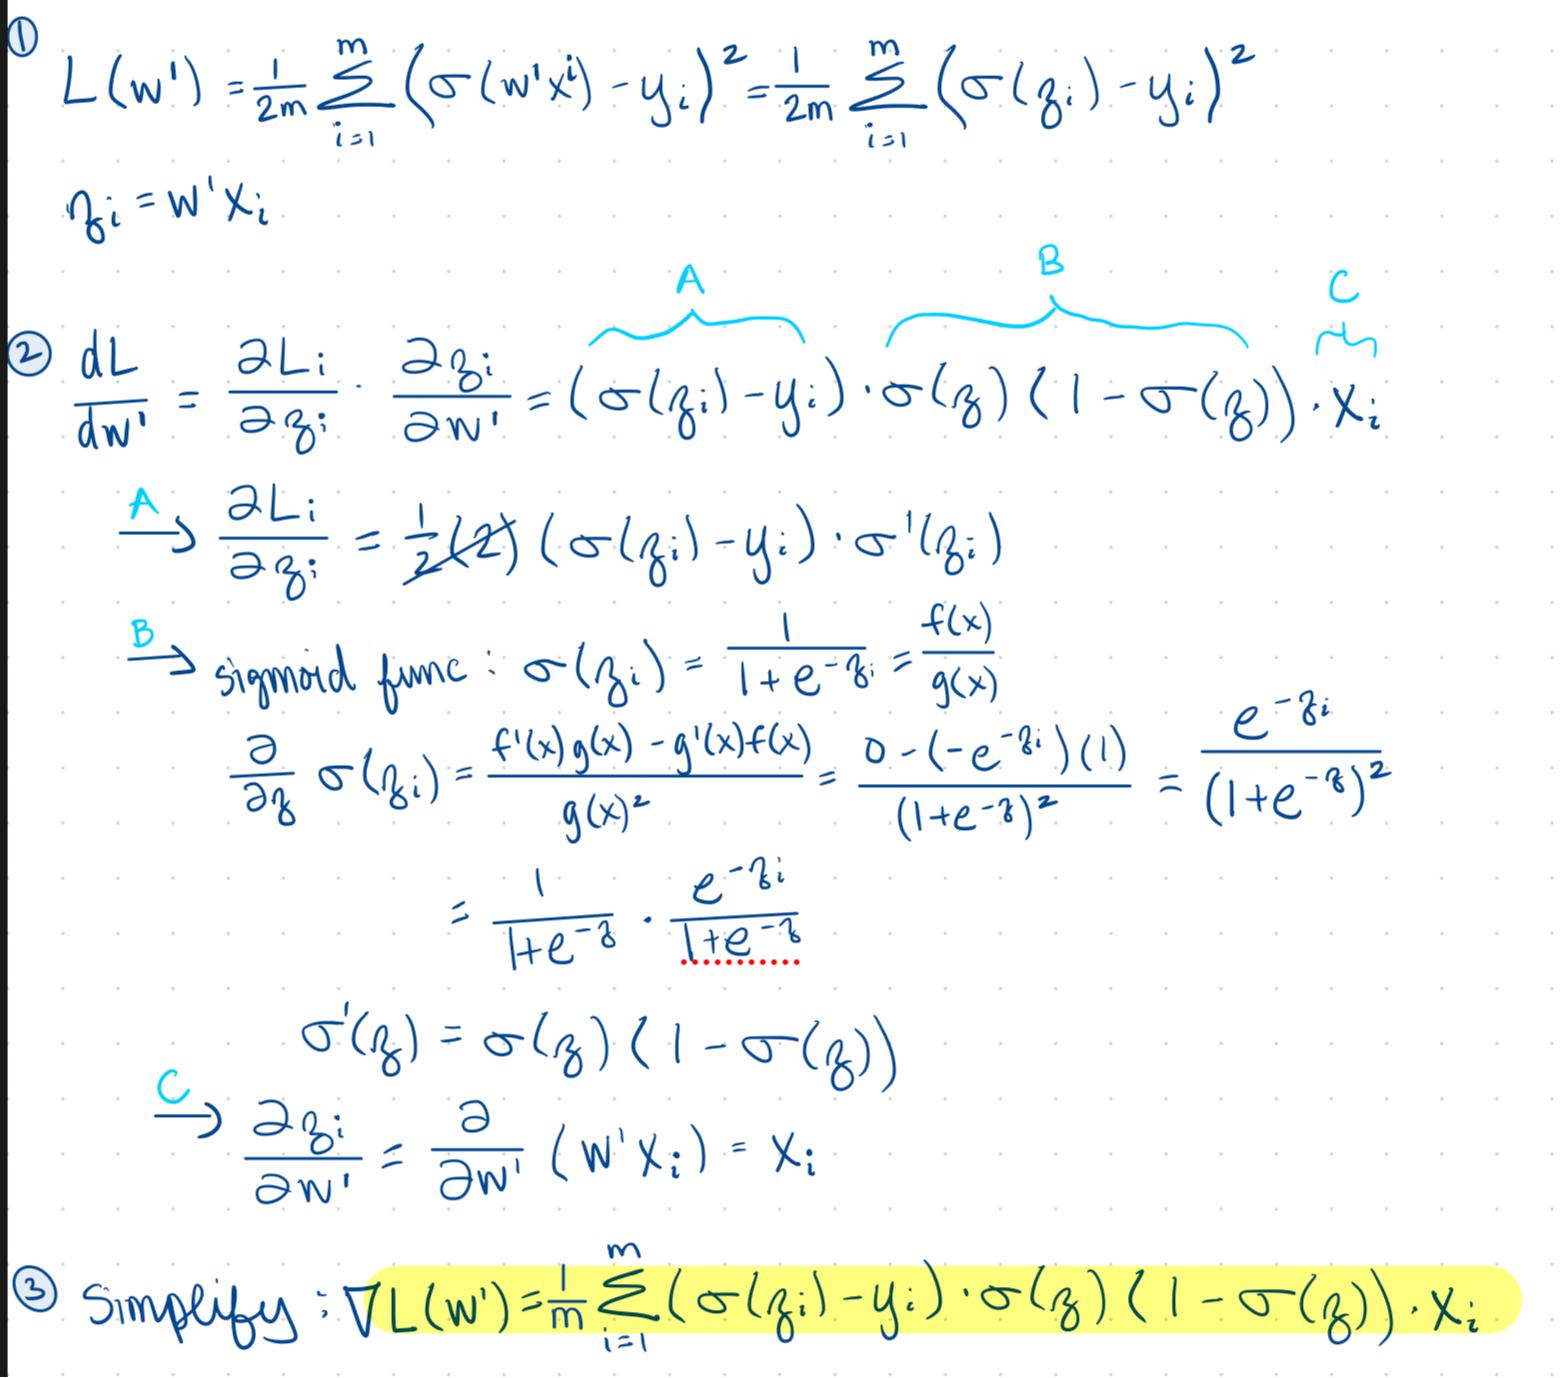

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [229]:
def sgd(X,y,m,n,w_prime,learning_rate=0.01,iterations=1000):
  for i in range(iterations):
    # pick a random training example
    i_random = np.random.randint(0,m)
    X_i, y_i = X[i_random], y[i_random]

    # Calculate gradient of loss using 1 datapoint
    sigmoid_i = sigmoid_func(np.dot(X_i,w_prime))

    # Gradient of loss = dL/dw' = sigmoid(zi)-yi)*sigmoid(zi)*(1-sigmoid(zi))*Xi
    gradient_i = (sigmoid_i-y_i) * sigmoid_i * (1-sigmoid_i) * X_i

    # Update weights
    w_prime = w_prime - learning_rate * gradient_i
  return w_prime

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [230]:
from sklearn.linear_model import LogisticRegression
import time

# Initiate values
results = {"Logistic Regression": [], "Gradient Descent, Slower": [], "Gradient Descent, Faster": [], "SGD": []} # stores the avg of wdiff for each algorithm (across trials) for each training set size m
times = {"Logistic Regression":0, "Gradient Descent, Slower":0, "Gradient Descent, Faster":0, "SGD":0} # time it took to train
m_set=[50,100,150,200,250] # training set sizes

# Run for every m training set size, and each for 10 trials
for m in m_set:
  for _ in range(10): #10 trials
    wdiff = {"Logistic Regression": [], "Gradient Descent, Slower": [], "Gradient Descent, Faster": [], "SGD": []} # list of ||w-w*||
    # (a) Generate w* & training set data
    w_star, X, y = generate_data(m)

    # Initiate values
    #m,n = X.shape # m = # of training samples/rows, n = 10 = # elements in each training sample
    n=10
    w_prime = np.zeros(n) # w' = weight vector output by each algorithm after training; initialize weights to 0

    # (b) Run algorithms, compute times & Euclidean norm=||w*-w'||
    start_time = time.time()
    wprime_alg1 = LogisticRegression(max_iter=1000).fit(X, y)
    times["Logistic Regression"] += time.time()-start_time #accumulating sum of time
    wdiff["Logistic Regression"].append(np.linalg.norm(w_star - wprime_alg1.coef_.flatten())) #np.linalg.norm computes the Euclidean norm, #stores each of the 3 lists contain 10 trials

    start_time = time.time()
    wprime_alg2 = gradient_descent_slower(X,y,m,n,w_prime)
    times["Gradient Descent, Slower"] += time.time()-start_time
    wdiff["Gradient Descent, Slower"].append(np.linalg.norm(w_star - wprime_alg2))
    start_time = time.time()
    wprime_alg22 = gradient_descent_faster(X,y,m,n,w_prime)
    times["Gradient Descent, Faster"]+= time.time()-start_time
    wdiff["Gradient Descent, Faster"].append(np.linalg.norm(w_star - wprime_alg22))

    start_time = time.time()
    wprime_alg3 = sgd(X,y,m,n,w_prime)
    times["SGD"] += time.time()-start_time
    wdiff["SGD"].append(np.linalg.norm(w_star - wprime_alg3))

  # (c) Each algorithm maps to a list of averaged ||w*-w'|| for each m value
  #for algorithm in results:
    #results[algorithm].append(np.mean(wdiff[algorithm]))
  for algorithm, value in results.items():
    value.append(np.mean(wdiff[algorithm]))
    """
    Example: { "Logistic Regression": [l1, l2, l3, l4, l5], #average of ||w*-w'|| for m=50, 100, 150,200,250
              #"Gradient Descent": [g1, g2, g3, g4, g5],
              #"SGD": [s1, s2, s3, s4, s5]
    }
    """


## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w -
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

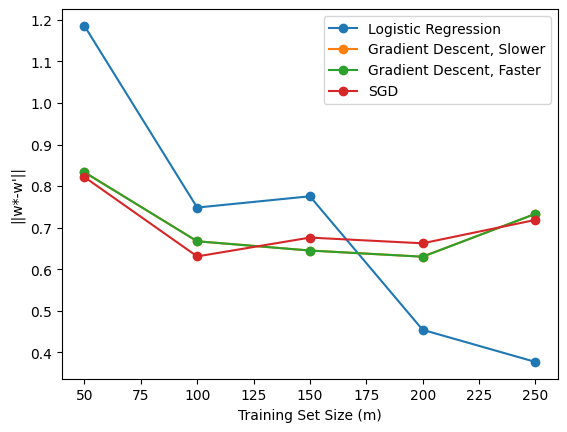

Logistic Regression, Total Time: 0.1406
Gradient Descent, Slower, Total Time: 49.1175
Gradient Descent, Faster, Total Time: 1.0440
SGD, Total Time: 0.6286
Logistic Regression: Results of ||w*-w'||:[1.1856287073583622, 0.7483424148130896, 0.7754564671620644, 0.45399249833554695, 0.3766741129068517]
Gradient Descent, Slower: Results of ||w*-w'||:[0.8333595261782015, 0.6671640412574102, 0.6448519767050531, 0.6299799355841962, 0.7331094684366635]
Gradient Descent, Faster: Results of ||w*-w'||:[0.8333595261782014, 0.6671640412574104, 0.6448519767050531, 0.6299799355841961, 0.7331094684366635]
SGD: Results of ||w*-w'||:[0.8217104788314374, 0.6307030675834994, 0.6759978254871162, 0.6622707611612988, 0.7185549474392562]


In [231]:
# Plot
for algorithm, values in results.items():
  plt.plot(m_set, values, marker='o', label=algorithm)
plt.xlabel("Training Set Size (m)")
plt.ylabel("||w*-w'||")
plt.legend()
plt.show()

# avg time per algorithm = total time/(5 training set sizes * 10 trials)
for algorithm in times:
  #times[algorithm] = times[algorithm]/(len(m_set)*10) #avg time per experiment
  print(f"{algorithm}, Total Time: {times[algorithm]:.4f}")

# Print out results
for algorithm in results:
  print(f"{algorithm}: Results of ||w*-w'||:{results[algorithm]}")

# Problem 2

In [232]:
from sklearn import datasets

In [233]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

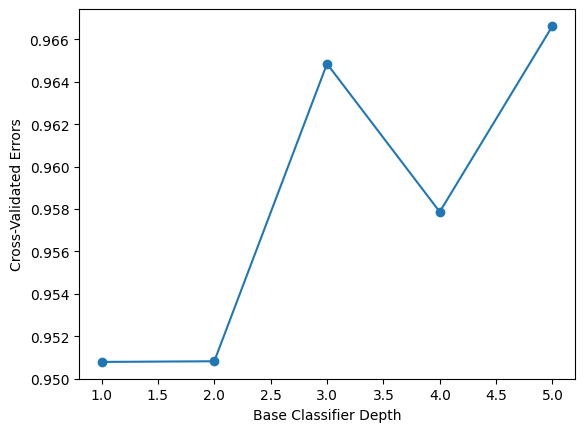

In [234]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Load dataset
X,y = cancer.data, cancer.target

# K-Fold cross-validator
# Ed Discussion said to use cv=10
#k_fold = KFold(n_splits = 5,shuffle=True, random_state=101)

# Initiate values
depths = range(1,6)
accuracies = []

# Perform 10-fold cross-validated error for each depth
for d in depths:
  baseclassifier = DecisionTreeClassifier(max_depth = d, random_state=101)
  adaboost = AdaBoostClassifier(estimator = baseclassifier, n_estimators = 10, learning_rate = 1, random_state = 101)
  cross_validated_scores = cross_val_score(adaboost, X,y,cv=10,scoring="accuracy")
  accuracies.append(cross_validated_scores.mean())

# Plot
plt.figure()
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Base Classifier Depth')
plt.ylabel('Cross-Validated Errors')
plt.show()